### <font color='red'>__REVISED__</font>

#### Importing packages

In [1]:
import numpy as np
import pandas as pd
from scipy import sparse
import seaborn as sns
import matplotlib.pyplot as plt

#### get benign scores

In [2]:
ben_score = []
f = open('11_ben100_circular_new_norm.txt','r')

for line in f:
    ben_score.append(line.strip())
len(ben_score)

928332

In [3]:
ben_score = [float(i) for i in ben_score] 

In [4]:
#ben_score

#### get other text scores (benign shuffled)

In [4]:
txt_score = []
f = open('12_ben100_shuffle_circular_new_norm.txt','r')

for line in f:
    txt_score.append(line.strip())
len(txt_score)

928332

In [5]:
txt_score = [float(i) for i in txt_score] 

#### look at minimum scores in both lists

In [6]:
min(ben_score)

0.0

In [7]:
min(txt_score)

0.0

#### need to remove zeroes

In [8]:
count = 0
for i in txt_score:
    if i == 0:
        count+=1

In [9]:
count

2

In [10]:
count = 0
for i in ben_score:
    if i == 0:
        count+=1

In [11]:
count

2

In [12]:
ben_score_new = []
for i in range(len(ben_score)-1):
    if ben_score[i] != 0:
        ben_score_new.append(ben_score[i])

In [13]:
text_score_new = []
for i in range(len(txt_score)-1):
    if txt_score[i] != 0:
        text_score_new.append(txt_score[i])

In [14]:
min(ben_score_new)

0.060264723455774064

In [15]:
min(text_score_new)

0.060264723455774064

#### check length of both lists now

In [16]:
len(text_score_new)

928329

In [17]:
len(ben_score_new)

928329

#### need to make both lists equal

In [18]:
def make_equal(list1, list2):
    if (len(list1) > len(list2)):
        for i in range(len(list1)-len(list2)+1):
            if i != 0:
                list1.pop(len(list1)-1)
    elif (len(list2) > len(list1)):
        for i in range(len(list2)-len(list1)+1):
            if i != 0:
                list2.pop(len(list2)-1)

In [19]:
make_equal(ben_score_new,text_score_new)

In [20]:
len(ben_score_new)

928329

In [21]:
len(text_score_new)

928329

### Plot both distributions

Text(0, 0.5, 'Density')

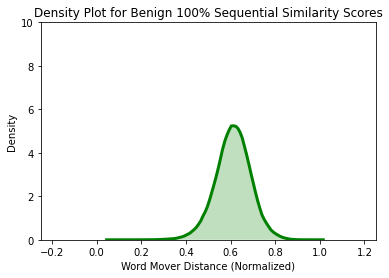

In [22]:
# Density Plot and Histogram of all normalized benign scores
sns.distplot(ben_score_new, hist=False, kde=True, 
             bins=int(180/5), color = 'green', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True , 'linewidth': 3}).set(xlim=(-0.25, 1.25),ylim=(0, 10))
plt.title('Density Plot for Benign 100% Sequential Similarity Scores')
plt.xlabel('Word Mover Distance (Normalized)')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

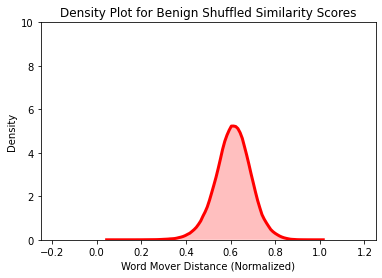

In [23]:
# Density Plot and Histogram of all normalized benign scores
sns.distplot(text_score_new, hist=False, kde=True, 
             bins=int(180/5), color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True , 'linewidth': 3}).set(xlim=(-0.25, 1.25),ylim=(0, 10))
plt.title('Density Plot for Benign Shuffled Similarity Scores')
plt.xlabel('Word Mover Distance (Normalized)')
plt.ylabel('Density')

### Divergence 
<br>
There are many situations where we may want to compare two probability distributions.
<br> <br>
Specifically, we may have a single random variable and two different probability distributions for the variable, such as a true distribution and an approximation of that distribution.
<br> <br>
In situations like this, it can be useful to quantify the difference between the distributions. Generally, this is referred to as the problem of calculating the statistical distance between two statistical objects, e.g. probability distributions.
<br> <br>
One approach is to calculate a distance measure between the two distributions. This can be challenging as it can be difficult to interpret the measure.
<br> <br>
Instead, it is more common to calculate a divergence between two probability distributions. A divergence is like a measure but is not symmetrical. This means that a divergence is a scoring of how one distribution differs from another, where calculating the divergence for distributions P and Q would give a different score from Q and P.

### Kullback Leibler

__Calculations__ <br> <br>
The Kullback-Leibler Divergence score, or KL divergence score, quantifies how much one probability distribution differs from another probability distribution.
<br> <br>
The KL divergence between two distributions Q and P is often stated using the following notation:
<br> <br>
KL(P || Q)
Where the “||” operator indicates “divergence” or Ps divergence from Q.
<br> <br>
KL divergence can be calculated as the negative sum of probability of each event in P multiplied by the log of the probability of the event in Q over the probability of the event in P.
<br> <br>
KL(P || Q) = – sum x in X P(x) * log(Q(x) / P(x))
The value within the sum is the divergence for a given event
<br> <br>
This is the same as the positive sum of probability of each event in P multiplied by the log of the probability of the event in P over the probability of the event in Q (e.g. the terms in the fraction are flipped). This is the more common implementation used in practice.
<br> <br>
KL(P || Q) = sum x in X P(x) * log(P(x) / Q(x))
<br> <br>
__Intuition__ <br> <br>
The intuition for the KL divergence score is that when the probability for an event from P is large, but the probability for the same event in Q is small, there is a large divergence. When the probability from P is small and the probability from Q is large, there is also a large divergence, but not as large as the first case.
<br> <br>
__When the score is 0, it suggests that both distributions are identical, otherwise the score is positive.__
<br> <br>
Importantly, the KL divergence score is not symmetrical, for example:
<br> <br>
KL(P || Q) != KL(Q || P)

__METHOD 1__

In [32]:
import time

In [38]:
# example of calculating the kl divergence (relative entropy) with scipy
from scipy.special import rel_entr

# calculate (P || Q)
start1 = time.time()
kl_pq = rel_entr(text_score_new, ben_score_new)
end1 = time.time()
print('KL(Text_Score || Ben_Score): %.3f nats' % sum(kl_pq))
print(f"This took {end1-start1} seconds to run")
# calculate (Q || P)
print("\n")
start2 = time.time()
kl_qp = rel_entr(ben_score_new, text_score_new)
end2 = time.time()
print('KL(Ben_Score || Text_Score): %.3f nats' % sum(kl_qp))
print(f"This took {end2-start2} seconds to run")

KL(Text_Score || Ben_Score): 10157.126 nats
This took 0.2673451900482178 seconds to run


KL(Ben_Score || Text_Score): 9831.292 nats
This took 0.27765560150146484 seconds to run


__METHOD 2__

In [25]:
# calculate the kl divergence
def kl_divergence(p, q):
    return sum(p[i] * log2(p[i]/q[i]) for i in range(len(p)))

In [26]:
from math import log2

In [39]:
# calculate (ben_score || text_score)
start1 = time.time()
kl_pq = kl_divergence(text_score_new, ben_score_new)
end1 = time.time()
print('KL(Text_Score || Ben_Score): %.3f bits' % kl_pq)
print(f"This took {end1-start1} seconds to run")

print("\n")
# calculate (Q || P)
start2 = time.time()
kl_qp = kl_divergence(ben_score_new, text_score_new)
end2 = time.time()
print('KL(Ben_Score || Text_Score): %.3f bits' % kl_qp)
print(f"This took {end2-start2} seconds to run")

KL(Text_Score || Ben_Score): 14653.635 bits
This took 0.7133302688598633 seconds to run


KL(Ben_Score || Text_Score): 14183.556 bits
This took 0.7450788021087646 seconds to run


### Jensen-Shannon Divergence

__METHOD 1__

In [28]:
# calculate the kl divergence
def kl_divergence(p, q):
    return sum(p[i] * log2(p[i]/q[i]) for i in range(len(p)))

# calculate the js divergence
def js_divergence(p, q):
    m = 0.5 * (p + q)
    return 0.5 * kl_divergence(p, m) + 0.5 * kl_divergence(q, m)

In [44]:
import math
# calculate JS(P || Q)
start1 = time.time()
js_pq = js_divergence(np.asarray(ben_score_new), np.asarray(text_score_new))
end1 = time.time()
print('JS(Ben_Score || Text_Score) divergence: %.3f bits' % js_pq)
print('JS(Ben_Score || Text_Score) distance: %.3f' % math.sqrt(js_pq))
print(f"This took {end1-start1} seconds to run")

JS(Ben_Score || Text_Score) divergence: 3583.060 bits
JS(Ben_Score || Text_Score) distance: 59.859
This took 6.002042293548584 seconds to run


In [45]:
# calculate JS(Q || P)
start1 = time.time()
js_qp = js_divergence(np.asarray(ben_score_new), np.asarray(text_score_new))
end1 = time.time()
print('JS(Text_Score || Ben_Score) divergence: %.3f bits' % js_qp)
print('JS(Text_Score || Ben_Score) distance: %.3f' % math.sqrt(js_qp))
print(f"This took {end1-start1} seconds to run")

JS(Text_Score || Ben_Score) divergence: 3583.060 bits
JS(Text_Score || Ben_Score) distance: 59.859
This took 6.287030220031738 seconds to run


__METHOD 2__

In [31]:
# calculate the jensen-shannon distance metric
from scipy.spatial.distance import jensenshannon
from numpy import asarray

# calculate JS(P || Q)
js_pq = jensenshannon(ben_score_new, text_score_new, base = 2)
print('JS(P || Q) Distance: %.3f' % js_pq)
# calculate JS(Q || P)
js_qp = jensenshannon(text_score_new, ben_score_new, base = 2)
print('JS(Q || P) Distance: %.3f' % js_qp)

JS(P || Q) Distance: 0.079
JS(Q || P) Distance: 0.079
